<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/NN/Quest_NN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [1]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [2]:
# your code
data = boston_housing.load_data(test_split=0.2)

In [19]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [66]:
# your code
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

nn=Sequential()
nn.add(Dense(64,input_dim=13, activation='relu'))
nn.add(Dense(64,activation='relu'))
nn.add(Dense(1))





Print the model summary to get an overview of it in the cell below.

In [67]:
# your code
nn.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [68]:
from tensorflow.keras.optimizers import Adam
# your code
opt = Adam(0.001)

nn.compile(optimizer=opt, loss='mean_squared_error')


Fit the model on the train data. 1000 epochs should be more than enough. 

In [69]:
%%time
nnstory=nn.fit(X_train,
        y_train,
      epochs=1000,
        batch_size=20,
       validation_data=(X_test,y_test),
       verbose=0
      )

CPU times: user 25.9 s, sys: 1.7 s, total: 27.6 s
Wall time: 24.5 s


Finally, evaluate your model on the test data and get the score.

In [17]:
# your code:
import matplotlib.pyplot as plt
def show_history(story):
    fig, (ax2) = plt.subplots(1)
    fig.set_size_inches(10, 5)
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    ax2.set_ylim(0,200)
    plt.show()
    


In [ ]:
loss=nn.evaluate(X_test, y_test,verbose=0)
# print test loss and accuracy 
print(f"Loss:{loss[0]}")


Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 



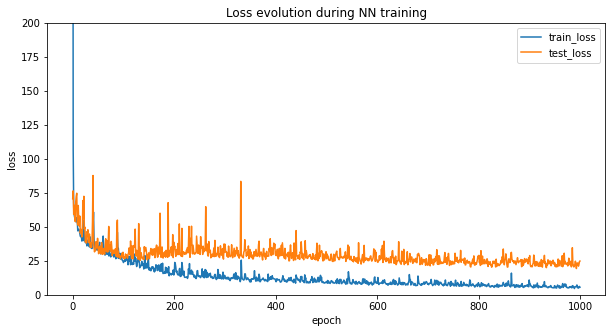

In [77]:
#plot the history using the above defined function show_history( )
show_history(nnstory)

In [64]:
del nn,nnstory

## Experiments
Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

### Scaling X

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler=scaler.fit(X_train)
X_train_sc= scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)


In [71]:
from keras.layers import Dense, Dropout, Activation, Flatten,Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

nn2=Sequential()
nn2.add(Dense(128,input_dim=13, activation='relu',kernel_regularizer='l2'))
nn2.add(Dense(128,activation='relu',kernel_regularizer='l2'))
nn2.add(Dense(1))
opt = Adam(0.0001)

nn2.compile(optimizer=opt, loss='mean_squared_error')

In [72]:
%%time
nn2story=nn2.fit(X_train_sc,
        y_train,
      epochs=1000,
        batch_size=20,
       validation_data=(X_test_sc,y_test),
       verbose=0
      )

CPU times: user 30 s, sys: 1.7 s, total: 31.8 s
Wall time: 27.7 s


In [73]:
#loss=nn2.evaluate(X_test_sc, y_test,verbose=0)
trainloss,testloss=nn2story.history['loss'][-1],nn2story.history['val_loss'][-1]
# print test loss and accuracy 
print(f"Train loss:{trainloss}, Test loss: {testloss}")

Train loss:4.251123905181885, Test loss: 14.997965812683105


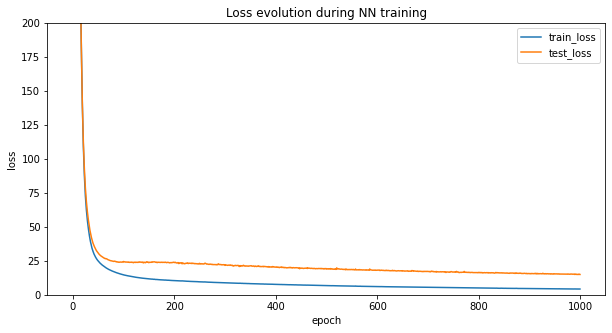

In [74]:
show_history(nn2story)

In [70]:
del nn2,nn2story